# Module 02: Probability Basics for Machine Learning

*A comprehensive beginner-friendly guide with theory, formulas, intuition, and hands-on Python examples.*

**Topics Covered:**
- Events, sample space, and basic probability rules
- Conditional probability and independence
- Bayes' theorem and base-rate effects
- Sensitivity, specificity, false positive/negative rates
- Positive/Negative Predictive Values (PPV/NPV)
- Class imbalance and its impact on interpreting errors

---

## 1. Events, Sample Space, and Basic Probability Rules

### 1.1 Fundamental Concepts

**Sample Space (S or Ω):**
- The set of all possible outcomes of an experiment
- Example: Rolling a die → S = {1, 2, 3, 4, 5, 6}

**Event (E):**
- A subset of the sample space
- Example: Rolling an even number → E = {2, 4, 6}

**Probability P(E):**
- Measure of how likely an event is to occur
$$P(E) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}$$

**Key Properties:**
- $0 \leq P(E) \leq 1$ for any event E
- $P(S) = 1$ (something must happen)
- $P(\emptyset) = 0$ (impossible event)
- $P(E^c) = 1 - P(E)$ where $E^c$ is the complement of E

### 1.2 Basic Probability Rules

**Addition Rule (OR):**

For mutually exclusive events (cannot occur simultaneously):
$$P(A \cup B) = P(A) + P(B)$$

For non-mutually exclusive events:
$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

**Multiplication Rule (AND):**

For independent events:
$$P(A \cap B) = P(A) \times P(B)$$

For dependent events:
$$P(A \cap B) = P(A) \times P(B|A)$$

**Key Points:**
- **Mutually Exclusive:** Events that cannot happen together (e.g., getting heads and tails on one coin flip)
- **Independent:** One event doesn't affect the probability of another
- Union ($\cup$) means "or" — at least one event occurs
- Intersection ($\cap$) means "and" — both events occur

PROBABILITY EXAMPLE: Drawing Cards from a Deck

P(Heart) = 13/52 = 0.2500
P(Face Card) = 12/52 = 0.2308
P(Heart AND Face) = 3/52 = 0.0577

Using Addition Rule:
P(Heart OR Face) = P(Heart) + P(Face) - P(Heart AND Face)
                 = 0.2500 + 0.2308 - 0.0577
                 = 0.4231

Complement Rule:
P(Not Heart) = 1 - P(Heart) = 1 - 0.2500 = 0.7500


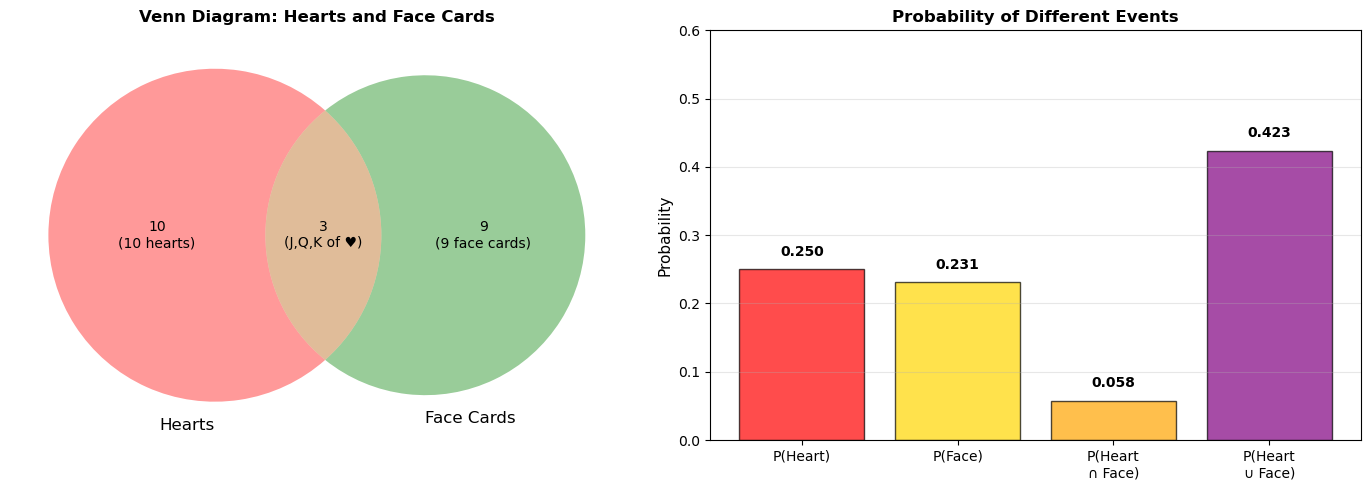

In [3]:
# Example: Basic Probability Rules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Example: Drawing cards
# Sample space for drawing one card from a standard deck
total_cards = 52
hearts = 13
face_cards = 12  # J, Q, K in each of 4 suits
heart_face_cards = 3  # J, Q, K of hearts

# Calculate probabilities
p_heart = hearts / total_cards
p_face = face_cards / total_cards
p_heart_and_face = heart_face_cards / total_cards
p_heart_or_face = p_heart + p_face - p_heart_and_face

print("=" * 60)
print("PROBABILITY EXAMPLE: Drawing Cards from a Deck")
print("=" * 60)
print(f"\nP(Heart) = {hearts}/{total_cards} = {p_heart:.4f}")
print(f"P(Face Card) = {face_cards}/{total_cards} = {p_face:.4f}")
print(f"P(Heart AND Face) = {heart_face_cards}/{total_cards} = {p_heart_and_face:.4f}")
print(f"\nUsing Addition Rule:")
print(f"P(Heart OR Face) = P(Heart) + P(Face) - P(Heart AND Face)")
print(f"                 = {p_heart:.4f} + {p_face:.4f} - {p_heart_and_face:.4f}")
print(f"                 = {p_heart_or_face:.4f}")

# Complement Rule
p_not_heart = 1 - p_heart
print(f"\nComplement Rule:")
print(f"P(Not Heart) = 1 - P(Heart) = 1 - {p_heart:.4f} = {p_not_heart:.4f}")

# Visualize with Venn diagram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Venn diagram
venn = venn2(subsets=(hearts - heart_face_cards, face_cards - heart_face_cards, heart_face_cards),
             set_labels=('Hearts', 'Face Cards'), ax=axes[0])
venn.get_label_by_id('10').set_text(f'{hearts - heart_face_cards}\n(10 hearts)')
venn.get_label_by_id('01').set_text(f'{face_cards - heart_face_cards}\n(9 face cards)')
venn.get_label_by_id('11').set_text(f'{heart_face_cards}\n(J,Q,K of ♥)')
axes[0].set_title('Venn Diagram: Hearts and Face Cards', fontsize=12, fontweight='bold')

# Bar chart of probabilities
events = ['P(Heart)', 'P(Face)', 'P(Heart\n∩ Face)', 'P(Heart\n∪ Face)']
probs = [p_heart, p_face, p_heart_and_face, p_heart_or_face]
colors = ['red', 'gold', 'orange', 'purple']

axes[1].bar(events, probs, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Probability', fontsize=11)
axes[1].set_title('Probability of Different Events', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 0.6)
axes[1].grid(axis='y', alpha=0.3)

for i, (event, prob) in enumerate(zip(events, probs)):
    axes[1].text(i, prob + 0.02, f'{prob:.3f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)

## 2. Conditional Probability and Independence

### 2.1 Conditional Probability

**Definition:**
Probability of event A given that event B has occurred:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}, \quad \text{where } P(B) > 0$$

**Intuition:**
- We "zoom in" to the reduced sample space where B has occurred
- Only consider outcomes where B is true
- Calculate probability of A within this restricted space

**Key Points:**
- $P(A|B)$ is read as "probability of A given B"
- Conditioning reduces the sample space
- $P(A|B) \neq P(B|A)$ in general (order matters!)
- If A and B are independent: $P(A|B) = P(A)$

### 2.2 Independence

**Definition:**
Events A and B are independent if:

$$P(A \cap B) = P(A) \times P(B)$$

Equivalently:
$$P(A|B) = P(A) \quad \text{and} \quad P(B|A) = P(B)$$

**Intuition:**
- Knowing B occurred doesn't change the probability of A
- The events don't influence each other
- Information about one doesn't help predict the other

**Examples:**
- **Independent:** Flipping two coins, rolling two dice
- **Dependent:** Drawing cards without replacement, weather on consecutive days

**Key Points:**
- Independence is symmetric: If A is independent of B, then B is independent of A
- Mutually exclusive events (except with probability 0) are NOT independent
- Independence is often an assumption in ML models (e.g., Naive Bayes)
- Real-world events are rarely truly independent

EXAMPLE 1: Medical Test (DEPENDENT Events)

Population: 1000 people
  - With disease: 100 (10.0%)
  - Without disease: 900 (90.0%)

Test Results:
  - Positive tests: 185
  - True Positives: 95
  - False Positives: 90

Conditional Probabilities:
  P(Test+|Disease) = 95/100 = 95.00%
  P(Disease|Test+) = 95/185 = 51.35%

Note: P(Test+|Disease) ≠ P(Disease|Test+)
These events are DEPENDENT!

EXAMPLE 2: Two Coin Flips (INDEPENDENT Events)

P(First coin = Heads) = 0.5
P(Second coin = Heads) = 0.5
P(Both Heads) = 0.5 × 0.5 = 0.25

P(Second Heads | First Heads) = 0.5
Knowing first coin doesn't change probability of second!
These events are INDEPENDENT!


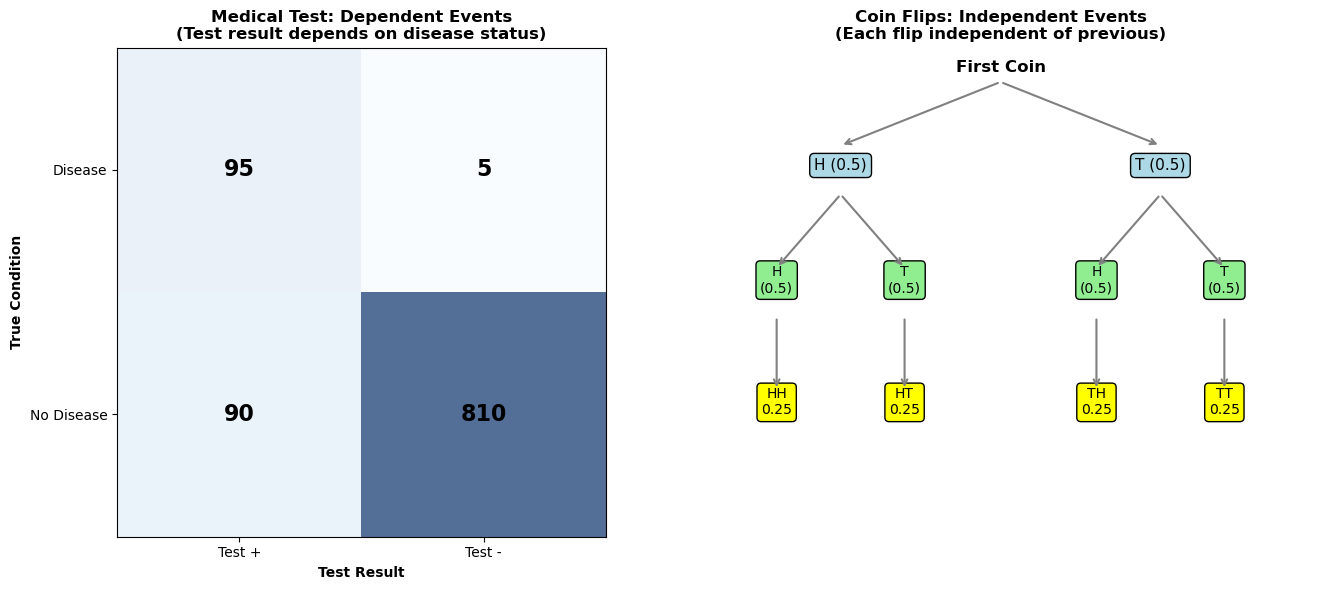

In [4]:
# Example: Conditional Probability and Independence
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example 1: Medical Testing (Dependent Events)
# Disease prevalence and test accuracy
has_disease = 100
no_disease = 900
total_pop = has_disease + no_disease

# Test results
test_pos_given_disease = 95  # True Positives
test_neg_given_disease = 5   # False Negatives
test_pos_given_no_disease = 90  # False Positives
test_neg_given_no_disease = 810  # True Negatives

# Calculate probabilities
p_disease = has_disease / total_pop
p_test_pos = (test_pos_given_disease + test_pos_given_no_disease) / total_pop
p_test_pos_and_disease = test_pos_given_disease / total_pop

# Conditional probabilities
p_test_pos_given_disease = test_pos_given_disease / has_disease
p_disease_given_test_pos = test_pos_given_disease / (test_pos_given_disease + test_pos_given_no_disease)

print("=" * 70)
print("EXAMPLE 1: Medical Test (DEPENDENT Events)")
print("=" * 70)
print(f"\nPopulation: {total_pop} people")
print(f"  - With disease: {has_disease} ({p_disease:.1%})")
print(f"  - Without disease: {no_disease} ({1-p_disease:.1%})")

print(f"\nTest Results:")
print(f"  - Positive tests: {test_pos_given_disease + test_pos_given_no_disease}")
print(f"  - True Positives: {test_pos_given_disease}")
print(f"  - False Positives: {test_pos_given_no_disease}")

print(f"\nConditional Probabilities:")
print(f"  P(Test+|Disease) = {test_pos_given_disease}/{has_disease} = {p_test_pos_given_disease:.2%}")
print(f"  P(Disease|Test+) = {test_pos_given_disease}/{test_pos_given_disease + test_pos_given_no_disease} = {p_disease_given_test_pos:.2%}")

print(f"\nNote: P(Test+|Disease) ≠ P(Disease|Test+)")
print(f"These events are DEPENDENT!")

# Example 2: Coin Flips (Independent Events)
print("\n" + "=" * 70)
print("EXAMPLE 2: Two Coin Flips (INDEPENDENT Events)")
print("=" * 70)

p_heads_first = 0.5
p_heads_second = 0.5
p_both_heads = p_heads_first * p_heads_second

print(f"\nP(First coin = Heads) = {p_heads_first}")
print(f"P(Second coin = Heads) = {p_heads_second}")
print(f"P(Both Heads) = {p_heads_first} × {p_heads_second} = {p_both_heads}")
print(f"\nP(Second Heads | First Heads) = {p_heads_second}")
print(f"Knowing first coin doesn't change probability of second!")
print(f"These events are INDEPENDENT!")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Medical test confusion matrix
confusion_matrix = np.array([
    [test_pos_given_disease, test_neg_given_disease],
    [test_pos_given_no_disease, test_neg_given_no_disease]
])

im = axes[0].imshow(confusion_matrix, cmap='Blues', alpha=0.7)
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Test +', 'Test -'])
axes[0].set_yticklabels(['Disease', 'No Disease'])
axes[0].set_xlabel('Test Result', fontweight='bold')
axes[0].set_ylabel('True Condition', fontweight='bold')
axes[0].set_title('Medical Test: Dependent Events\n(Test result depends on disease status)', 
                 fontweight='bold')

for i in range(2):
    for j in range(2):
        text = axes[0].text(j, i, confusion_matrix[i, j],
                          ha="center", va="center", color="black", fontsize=16, fontweight='bold')

# Coin flips tree
axes[1].text(0.5, 0.95, 'First Coin', ha='center', fontsize=12, fontweight='bold')
axes[1].text(0.25, 0.75, 'H (0.5)', ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightblue'))
axes[1].text(0.75, 0.75, 'T (0.5)', ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightblue'))

axes[1].text(0.15, 0.5, 'H\n(0.5)', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen'))
axes[1].text(0.35, 0.5, 'T\n(0.5)', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen'))
axes[1].text(0.65, 0.5, 'H\n(0.5)', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen'))
axes[1].text(0.85, 0.5, 'T\n(0.5)', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen'))

axes[1].text(0.15, 0.25, 'HH\n0.25', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow'))
axes[1].text(0.35, 0.25, 'HT\n0.25', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow'))
axes[1].text(0.65, 0.25, 'TH\n0.25', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow'))
axes[1].text(0.85, 0.25, 'TT\n0.25', ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow'))

# Draw arrows
for x_start, y_start, x_end, y_end in [
    (0.5, 0.93, 0.25, 0.8), (0.5, 0.93, 0.75, 0.8),
    (0.25, 0.7, 0.15, 0.55), (0.25, 0.7, 0.35, 0.55),
    (0.75, 0.7, 0.65, 0.55), (0.75, 0.7, 0.85, 0.55),
    (0.15, 0.45, 0.15, 0.3), (0.35, 0.45, 0.35, 0.3),
    (0.65, 0.45, 0.65, 0.3), (0.85, 0.45, 0.85, 0.3)
]:
    axes[1].annotate('', xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))

axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].axis('off')
axes[1].set_title('Coin Flips: Independent Events\n(Each flip independent of previous)', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)

## 3. Bayes' Theorem

### 3.1 The Formula and Intuition

**Bayes' Theorem:**

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Or equivalently:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|A^c) \cdot P(A^c)}$$

**Components:**
- **P(A|B)** = Posterior probability (what we want to find)
- **P(B|A)** = Likelihood (how likely is B given A)
- **P(A)** = Prior probability (our initial belief about A)
- **P(B)** = Evidence or marginal probability (normalizing constant)

**Intuition:**
Bayes' theorem allows us to "flip" conditional probabilities. If we know P(B|A) but want P(A|B), we can calculate it using prior knowledge P(A).

**Key Insight:**
$$\text{Posterior} = \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}$$

**Key Points:**
- Bayes updates beliefs based on new evidence
- The prior P(A) matters! (base-rate effect)
- Critical for machine learning: classification, spam filters, medical diagnosis
- Foundation of Bayesian statistics and probabilistic ML

### 3.2 Base-Rate Effect (Prior Probability Impact)

**Base Rate Fallacy:**
Ignoring the prior probability P(A) when making judgments, focusing only on P(B|A).

**Example Scenario:**
A rare disease affects 1 in 1,000 people. A test is 99% accurate (both sensitivity and specificity).

- P(Disease) = 0.001 (base rate/prior)
- P(Test+|Disease) = 0.99 (sensitivity)
- P(Test+|No Disease) = 0.01 (false positive rate)

**Question:** If you test positive, what's the probability you have the disease?

**Common Wrong Intuition:** "The test is 99% accurate, so I probably have it!"

**Correct Calculation using Bayes:**

$$P(\text{Disease}|\text{Test+}) = \frac{P(\text{Test+}|\text{Disease}) \cdot P(\text{Disease})}{P(\text{Test+})}$$

$$P(\text{Disease}|\text{Test+}) = \frac{0.99 \times 0.001}{0.99 \times 0.001 + 0.01 \times 0.999} \approx 0.09 = 9\%$$

**Key Insight:**
Even with a positive test, you only have ~9% chance of having the disease! The low base rate (0.1%) dominates the calculation.

**Lessons for Machine Learning:**
- Always consider class prevalence (prior probabilities)
- Rare events need different treatment than common ones
- Model accuracy metrics can be misleading without context
- This is why we need precision, recall, and class-aware metrics

BAYES' THEOREM: Rare Disease Example

Scenario 1: RARE Disease (Base rate = 0.1%)
Test Characteristics:
  - Sensitivity (TPR): 99%
  - Specificity (TNR): 99%

Using Bayes' Theorem:
  P(Disease|Test+) = 9.0%

⚠️  Even with 99% accurate test, only 9.0% chance of disease!
  This is the BASE-RATE EFFECT in action!

----------------------------------------------------------------------
Scenario 2: COMMON Disease (Base rate = 10%)
Same test characteristics (99% sensitivity and specificity)
  P(Disease|Test+) = 91.7%

✓ With higher base rate, positive test is much more informative!

----------------------------------------------------------------------
Scenario 3: VERY COMMON Disease (Base rate = 50%)
  P(Disease|Test+) = 99.0%


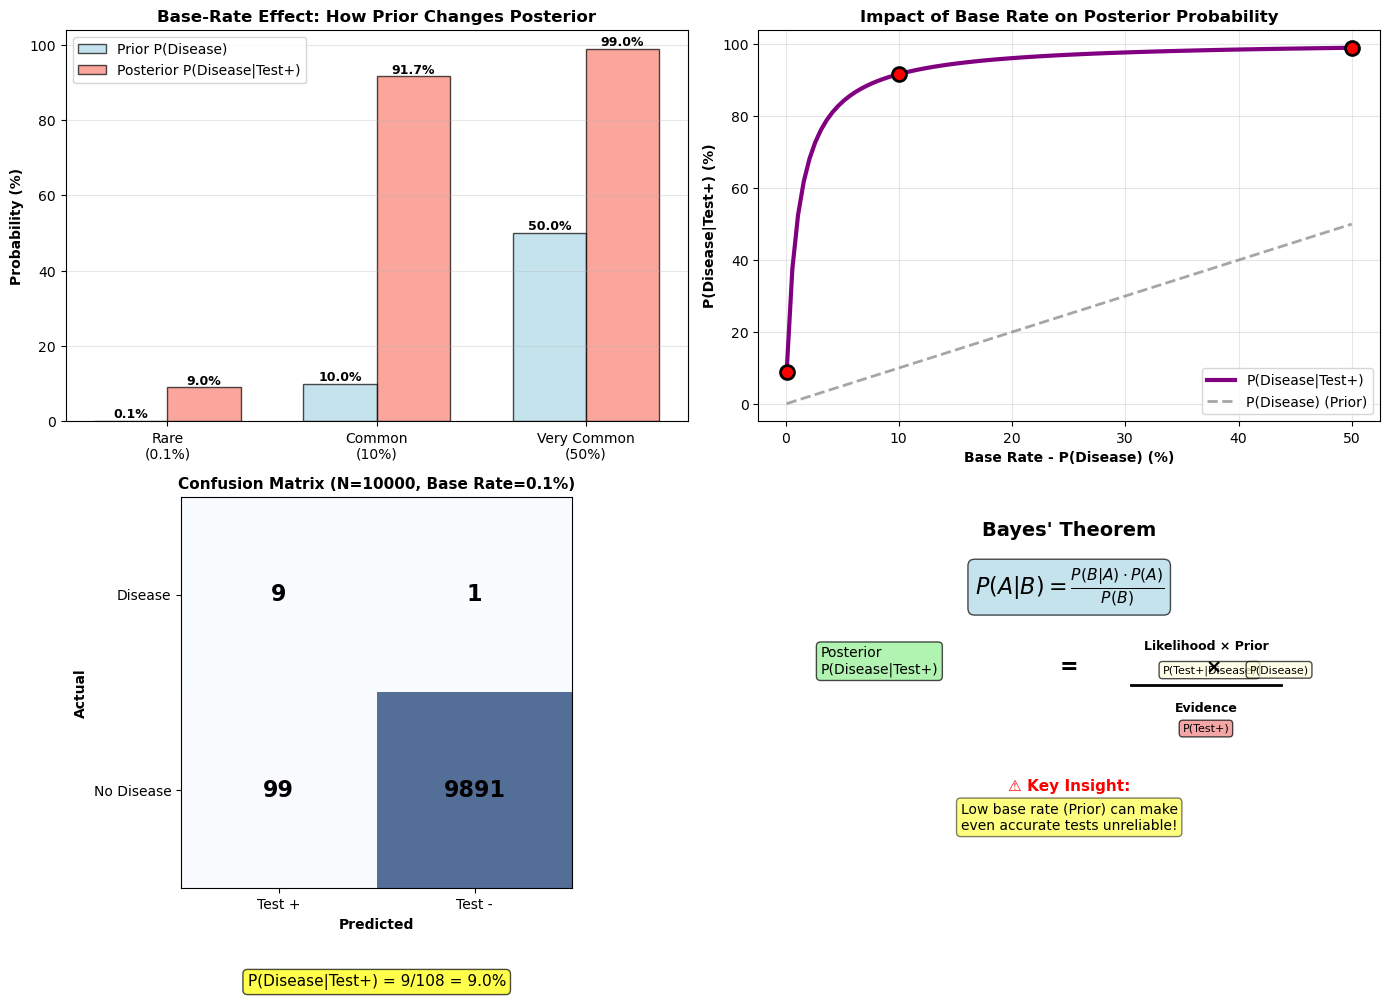

In [5]:
# Example: Bayes' Theorem and Base-Rate Effect
import numpy as np
import matplotlib.pyplot as plt

def calculate_bayes(prior, sensitivity, specificity):
    """
    Calculate P(Disease|Test+) using Bayes' theorem
    
    Parameters:
    - prior: P(Disease)
    - sensitivity: P(Test+|Disease) - True Positive Rate
    - specificity: P(Test-|No Disease) - True Negative Rate
    """
    false_positive_rate = 1 - specificity
    
    # P(Test+) using law of total probability
    p_test_positive = (sensitivity * prior) + (false_positive_rate * (1 - prior))
    
    # Bayes' theorem
    posterior = (sensitivity * prior) / p_test_positive
    
    return posterior, p_test_positive

# Scenario 1: Rare disease (base rate = 0.1%)
print("=" * 70)
print("BAYES' THEOREM: Rare Disease Example")
print("=" * 70)

prior_rare = 0.001  # 1 in 1000
sensitivity = 0.99   # 99% true positive rate
specificity = 0.99   # 99% true negative rate

posterior_rare, p_test_pos_rare = calculate_bayes(prior_rare, sensitivity, specificity)

print(f"\nScenario 1: RARE Disease (Base rate = {prior_rare:.1%})")
print(f"Test Characteristics:")
print(f"  - Sensitivity (TPR): {sensitivity:.0%}")
print(f"  - Specificity (TNR): {specificity:.0%}")
print(f"\nUsing Bayes' Theorem:")
print(f"  P(Disease|Test+) = {posterior_rare:.1%}")
print(f"\n⚠️  Even with 99% accurate test, only {posterior_rare:.1%} chance of disease!")
print(f"  This is the BASE-RATE EFFECT in action!")

# Scenario 2: Common disease (base rate = 10%)
prior_common = 0.10
posterior_common, p_test_pos_common = calculate_bayes(prior_common, sensitivity, specificity)

print(f"\n" + "-" * 70)
print(f"Scenario 2: COMMON Disease (Base rate = {prior_common:.0%})")
print(f"Same test characteristics (99% sensitivity and specificity)")
print(f"  P(Disease|Test+) = {posterior_common:.1%}")
print(f"\n✓ With higher base rate, positive test is much more informative!")

# Scenario 3: Very common (base rate = 50%)
prior_very_common = 0.50
posterior_very_common, p_test_pos_very_common = calculate_bayes(prior_very_common, sensitivity, specificity)

print(f"\n" + "-" * 70)
print(f"Scenario 3: VERY COMMON Disease (Base rate = {prior_very_common:.0%})")
print(f"  P(Disease|Test+) = {posterior_very_common:.1%}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar chart comparing scenarios
scenarios = ['Rare\n(0.1%)', 'Common\n(10%)', 'Very Common\n(50%)']
priors = [prior_rare * 100, prior_common * 100, prior_very_common * 100]
posteriors = [posterior_rare * 100, posterior_common * 100, posterior_very_common * 100]

x = np.arange(len(scenarios))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, priors, width, label='Prior P(Disease)', 
                       color='lightblue', edgecolor='black', alpha=0.7)
bars2 = axes[0, 0].bar(x + width/2, posteriors, width, label='Posterior P(Disease|Test+)', 
                       color='salmon', edgecolor='black', alpha=0.7)

axes[0, 0].set_ylabel('Probability (%)', fontweight='bold')
axes[0, 0].set_title('Base-Rate Effect: How Prior Changes Posterior', fontweight='bold', fontsize=12)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(scenarios)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Sensitivity analysis: varying base rate
base_rates = np.linspace(0.001, 0.5, 100)
posteriors_curve = []

for br in base_rates:
    post, _ = calculate_bayes(br, sensitivity, specificity)
    posteriors_curve.append(post)

axes[0, 1].plot(base_rates * 100, np.array(posteriors_curve) * 100, 
               linewidth=3, color='purple', label='P(Disease|Test+)')
axes[0, 1].plot(base_rates * 100, base_rates * 100, 
               linestyle='--', linewidth=2, color='gray', alpha=0.7, label='P(Disease) (Prior)')
axes[0, 1].scatter([prior_rare * 100, prior_common * 100, prior_very_common * 100],
                  [posterior_rare * 100, posterior_common * 100, posterior_very_common * 100],
                  s=100, color='red', zorder=5, edgecolor='black', linewidth=2)
axes[0, 1].set_xlabel('Base Rate - P(Disease) (%)', fontweight='bold')
axes[0, 1].set_ylabel('P(Disease|Test+) (%)', fontweight='bold')
axes[0, 1].set_title('Impact of Base Rate on Posterior Probability', fontweight='bold', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Confusion Matrix for Rare Disease
population = 10000
diseased = int(population * prior_rare)
healthy = population - diseased

tp = int(diseased * sensitivity)
fn = diseased - tp
fp = int(healthy * (1 - specificity))
tn = healthy - fp

confusion = np.array([[tp, fn], [fp, tn]])
im = axes[1, 0].imshow(confusion, cmap='Blues', alpha=0.7)

axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_yticks([0, 1])
axes[1, 0].set_xticklabels(['Test +', 'Test -'])
axes[1, 0].set_yticklabels(['Disease', 'No Disease'])
axes[1, 0].set_xlabel('Predicted', fontweight='bold')
axes[1, 0].set_ylabel('Actual', fontweight='bold')
axes[1, 0].set_title(f'Confusion Matrix (N={population}, Base Rate={prior_rare:.1%})', 
                    fontweight='bold', fontsize=11)

for i in range(2):
    for j in range(2):
        text = axes[1, 0].text(j, i, f'{confusion[i, j]}',
                              ha="center", va="center", color="black", fontsize=16, fontweight='bold')

axes[1, 0].text(0.5, -0.25, f'P(Disease|Test+) = {tp}/{tp+fp} = {posterior_rare:.1%}', 
               ha='center', transform=axes[1, 0].transAxes, fontsize=11, 
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 4. Bayes' Theorem Visualization
axes[1, 1].text(0.5, 0.9, "Bayes' Theorem", ha='center', fontsize=14, fontweight='bold')
axes[1, 1].text(0.5, 0.75, r'$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$', 
               ha='center', fontsize=16, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

components = [
    ('Posterior\nP(Disease|Test+)', 0.55, 'What we want'),
    ('Likelihood\nP(Test+|Disease)', 0.35, 'Test sensitivity'),
    ('Prior\nP(Disease)', 0.35, 'Base rate'),
    ('Evidence\nP(Test+)', 0.15, 'Normalizing constant')
]

axes[1, 1].text(0.1, 0.55, 'Posterior\nP(Disease|Test+)', fontsize=10, 
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[1, 1].text(0.5, 0.55, '=', ha='center', fontsize=16, fontweight='bold')

axes[1, 1].text(0.72, 0.61, 'Likelihood × Prior', ha='center', fontsize=9, fontweight='bold')
axes[1, 1].text(0.65, 0.55, 'P(Test+|Disease)', fontsize=8, 
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
axes[1, 1].text(0.72, 0.55, '×', fontsize=14, fontweight='bold')
axes[1, 1].text(0.79, 0.55, 'P(Disease)', fontsize=8, 
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

axes[1, 1].plot([0.6, 0.84], [0.52, 0.52], 'k-', linewidth=2)

axes[1, 1].text(0.72, 0.45, 'Evidence', ha='center', fontsize=9, fontweight='bold')
axes[1, 1].text(0.72, 0.40, 'P(Test+)', ha='center', fontsize=8, 
               bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

axes[1, 1].text(0.5, 0.25, '⚠️ Key Insight:', ha='center', fontsize=11, fontweight='bold', color='red')
axes[1, 1].text(0.5, 0.15, 'Low base rate (Prior) can make\neven accurate tests unreliable!', 
               ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)

## 4. Binary Classification Metrics

### 4.1 Confusion Matrix

For a binary classification problem (Positive/Negative classes):

|  | **Predicted Positive** | **Predicted Negative** |
|---|---|---|
| **Actually Positive** | True Positive (TP) | False Negative (FN) |
| **Actually Negative** | False Positive (FP) | True Negative (TN) |

**Key Relationships:**
- Total Positives = TP + FN
- Total Negatives = FP + TN
- Total Predictions = TP + FP + TN + FN

**Key Points:**
- TP: Correctly identified positives (✓ predicted sick when actually sick)
- TN: Correctly identified negatives (✓ predicted healthy when actually healthy)
- FP: Type I Error (⚠️ predicted sick when actually healthy)
- FN: Type II Error (⚠️ predicted healthy when actually sick)

### 4.2 Sensitivity and Specificity

**Sensitivity (True Positive Rate, Recall):**

$$\text{Sensitivity} = \frac{TP}{TP + FN} = \frac{TP}{\text{Total Actual Positives}}$$

**Interpretation:** Of all actual positive cases, what fraction did we correctly identify?

**Also called:** Recall, Hit Rate, Detection Rate

**Key Points:**
- Sensitivity = 1 means no false negatives (caught all positive cases)
- High sensitivity is critical when missing positives is costly (e.g., cancer screening)
- Answers: "How good are we at finding the positives?"

---

**Specificity (True Negative Rate):**

$$\text{Specificity} = \frac{TN}{TN + FP} = \frac{TN}{\text{Total Actual Negatives}}$$

**Interpretation:** Of all actual negative cases, what fraction did we correctly identify?

**Key Points:**
- Specificity = 1 means no false positives (correctly identified all negatives)
- High specificity is critical when false alarms are costly
- Answers: "How good are we at identifying negatives?"

**Trade-off:**
- Increasing sensitivity often decreases specificity (and vice versa)
- Moving decision threshold changes this balance
- ROC curve visualizes this trade-off

### 4.3 False Positive and False Negative Rates

**False Positive Rate (FPR):**

$$\text{FPR} = \frac{FP}{FP + TN} = \frac{FP}{\text{Total Actual Negatives}} = 1 - \text{Specificity}$$

**Interpretation:** Of all actual negatives, what fraction did we incorrectly label as positive?

**Also called:** Type I Error Rate, False Alarm Rate

**Key Points:**
- FPR = 0 is ideal (no false alarms)
- High FPR means many false alarms
- Critical in spam detection, fraud detection (false alarms annoy users)

---

**False Negative Rate (FNR):**

$$\text{FNR} = \frac{FN}{FN + TP} = \frac{FN}{\text{Total Actual Positives}} = 1 - \text{Sensitivity}$$

**Interpretation:** Of all actual positives, what fraction did we miss?

**Also called:** Type II Error Rate, Miss Rate

**Key Points:**
- FNR = 0 is ideal (missed nothing)
- High FNR means missing many positive cases
- Critical in medical diagnosis (missing a disease is dangerous)

**Important Relationships:**
- Sensitivity + FNR = 1
- Specificity + FPR = 1

### 4.4 Predictive Values: PPV and NPV

**Positive Predictive Value (PPV or Precision):**

$$\text{PPV} = \frac{TP}{TP + FP} = \frac{TP}{\text{Total Predicted Positives}}$$

**Interpretation:** Of all cases we predicted as positive, what fraction were actually positive?

**Also called:** Precision

**Key Points:**
- Answers: "When we say positive, how often are we right?"
- Affected by base rate (class prevalence)
- Low PPV = many false alarms
- Critical when acting on positive predictions is expensive

---

**Negative Predictive Value (NPV):**

$$\text{NPV} = \frac{TN}{TN + FN} = \frac{TN}{\text{Total Predicted Negatives}}$$

**Interpretation:** Of all cases we predicted as negative, what fraction were actually negative?

**Key Points:**
- Answers: "When we say negative, how often are we right?"
- Affected by base rate (class prevalence)
- High NPV = confident in negative predictions
- Critical when ruling out a condition

**Critical Distinction:**

| Metric | Question | Denominator |
|--------|----------|-------------|
| **Sensitivity** | "How many actual positives did we find?" | Actual Positives (TP + FN) |
| **PPV/Precision** | "How many predicted positives are real?" | Predicted Positives (TP + FP) |

**Why This Matters:**
- Sensitivity/Specificity: Properties of the test (don't change with prevalence)
- PPV/NPV: Clinical usefulness (change dramatically with prevalence)

CLASSIFICATION METRICS: Medical Diagnosis Example

Population: 1000 patients
  Actual Positives (Disease): 100
  Actual Negatives (Healthy): 900

Confusion Matrix:
  True Positives (TP):  85
  False Positives (FP): 50
  False Negatives (FN): 15
  True Negatives (TN):  850

----------------------------------------------------------------------
CALCULATED METRICS:
----------------------------------------------------------------------
Sensitivity (Recall/TPR)...... 85.0%
Specificity (TNR)............. 94.4%
PPV (Precision)............... 63.0%
NPV........................... 98.3%
FPR (1-Specificity)........... 5.6%
FNR (1-Sensitivity)........... 15.0%
Accuracy...................... 93.5%

----------------------------------------------------------------------
INTERPRETATION:
----------------------------------------------------------------------
• Sensitivity 85.0%: We catch 85.0% of actual disease cases
• Specificity 94.4%: We correctly identify 94.4% of healthy people
• PPV 63.0%: When we

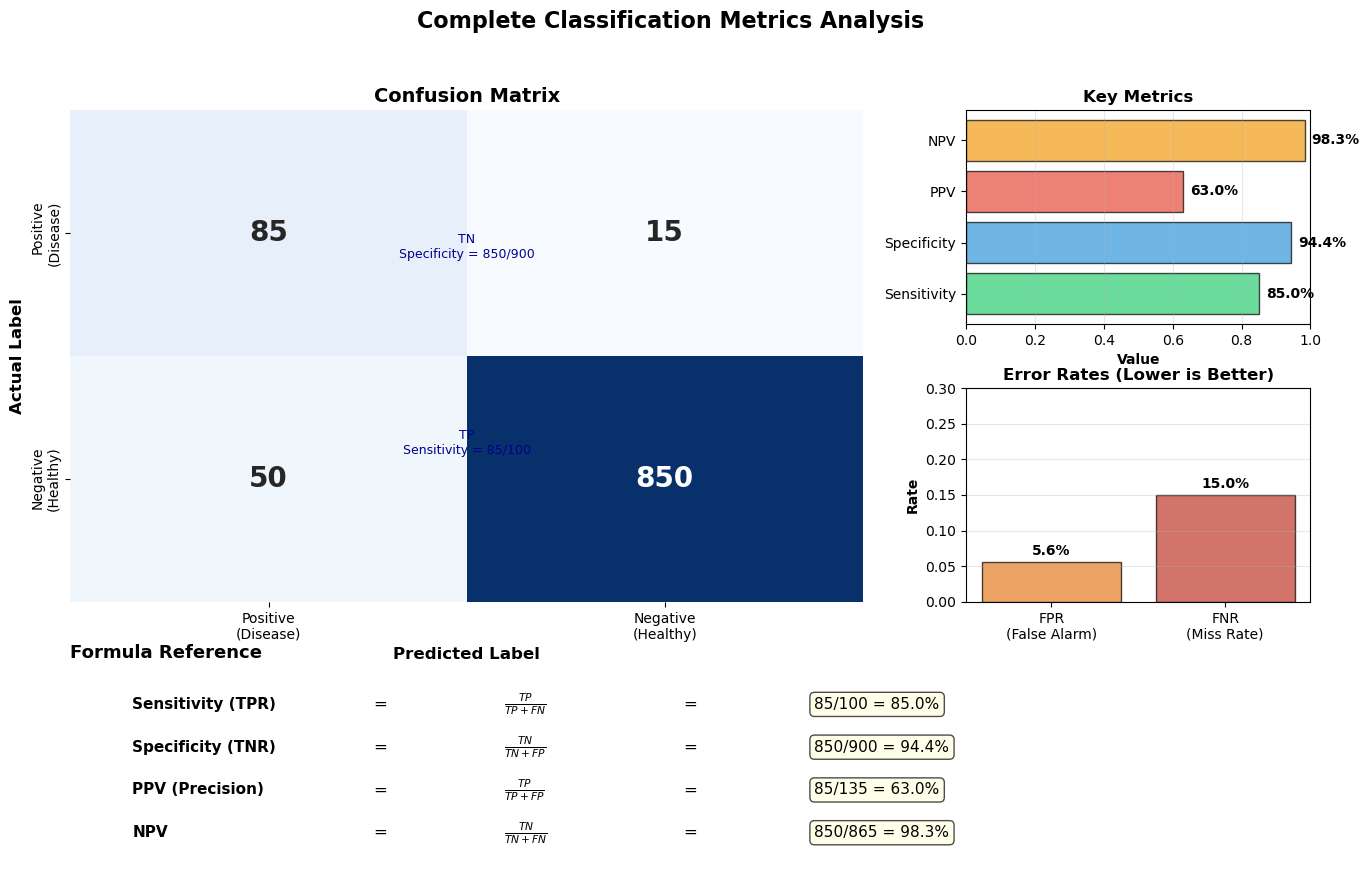

In [6]:
# Example: Classification Metrics with Medical Diagnosis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def calculate_metrics(tp, fp, fn, tn):
    """Calculate all classification metrics"""
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    
    return {
        'Sensitivity (Recall/TPR)': sensitivity,
        'Specificity (TNR)': specificity,
        'PPV (Precision)': ppv,
        'NPV': npv,
        'FPR (1-Specificity)': fpr,
        'FNR (1-Sensitivity)': fnr,
        'Accuracy': accuracy
    }

# Medical diagnosis example
print("=" * 70)
print("CLASSIFICATION METRICS: Medical Diagnosis Example")
print("=" * 70)

# Scenario: Testing 1,000 patients for a disease
# True condition: 100 have disease, 900 don't
tp = 85   # Correctly identified sick patients
fn = 15   # Missed sick patients (false negatives)
fp = 50   # False alarms (false positives)
tn = 850  # Correctly identified healthy patients

total = tp + fp + fn + tn
actual_positives = tp + fn
actual_negatives = fp + tn
predicted_positives = tp + fp
predicted_negatives = fn + tn

print(f"\nPopulation: {total} patients")
print(f"  Actual Positives (Disease): {actual_positives}")
print(f"  Actual Negatives (Healthy): {actual_negatives}")
print(f"\nConfusion Matrix:")
print(f"  True Positives (TP):  {tp}")
print(f"  False Positives (FP): {fp}")
print(f"  False Negatives (FN): {fn}")
print(f"  True Negatives (TN):  {tn}")

metrics = calculate_metrics(tp, fp, fn, tn)

print(f"\n" + "-" * 70)
print("CALCULATED METRICS:")
print("-" * 70)

for metric_name, value in metrics.items():
    print(f"{metric_name:.<30} {value:.1%}")

print(f"\n" + "-" * 70)
print("INTERPRETATION:")
print("-" * 70)
print(f"• Sensitivity {metrics['Sensitivity (Recall/TPR)']:.1%}: We catch {metrics['Sensitivity (Recall/TPR)']:.1%} of actual disease cases")
print(f"• Specificity {metrics['Specificity (TNR)']:.1%}: We correctly identify {metrics['Specificity (TNR)']:.1%} of healthy people")
print(f"• PPV {metrics['PPV (Precision)']:.1%}: When we say 'disease', we're right {metrics['PPV (Precision)']:.1%} of the time")
print(f"• NPV {metrics['NPV']:.1%}: When we say 'healthy', we're right {metrics['NPV']:.1%} of the time")

# Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Confusion Matrix (large)
ax1 = fig.add_subplot(gs[0:2, 0:2])
cm = np.array([[tp, fn], [fp, tn]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
            annot_kws={'size': 20, 'weight': 'bold'})
ax1.set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
ax1.set_ylabel('Actual Label', fontweight='bold', fontsize=12)
ax1.set_xticklabels(['Positive\n(Disease)', 'Negative\n(Healthy)'])
ax1.set_yticklabels(['Positive\n(Disease)', 'Negative\n(Healthy)'])
ax1.set_title('Confusion Matrix', fontweight='bold', fontsize=14)

# Add metric labels to confusion matrix
ax1.text(0.5, 0.3, f'TP\nSensitivity = {tp}/{actual_positives}', 
        ha='center', fontsize=9, color='darkblue', transform=ax1.transAxes)
ax1.text(0.5, 0.7, f'TN\nSpecificity = {tn}/{actual_negatives}', 
        ha='center', fontsize=9, color='darkblue', transform=ax1.transAxes)

# 2. Metrics bar chart
ax2 = fig.add_subplot(gs[0, 2])
metric_names = ['Sensitivity', 'Specificity', 'PPV', 'NPV']
metric_values = [metrics['Sensitivity (Recall/TPR)'], metrics['Specificity (TNR)'], 
                 metrics['PPV (Precision)'], metrics['NPV']]
colors_metrics = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

bars = ax2.barh(metric_names, metric_values, color=colors_metrics, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Value', fontweight='bold')
ax2.set_title('Key Metrics', fontweight='bold', fontsize=12)
ax2.set_xlim(0, 1)
ax2.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, metric_values)):
    ax2.text(val + 0.02, i, f'{val:.1%}', va='center', fontweight='bold', fontsize=10)

# 3. Error rates
ax3 = fig.add_subplot(gs[1, 2])
error_names = ['FPR\n(False Alarm)', 'FNR\n(Miss Rate)']
error_values = [metrics['FPR (1-Specificity)'], metrics['FNR (1-Sensitivity)']]
colors_errors = ['#e67e22', '#c0392b']

bars_err = ax3.bar(error_names, error_values, color=colors_errors, edgecolor='black', alpha=0.7)
ax3.set_ylabel('Rate', fontweight='bold')
ax3.set_title('Error Rates (Lower is Better)', fontweight='bold', fontsize=12)
ax3.set_ylim(0, 0.3)
ax3.grid(axis='y', alpha=0.3)

for bar, val in zip(bars_err, error_values):
    ax3.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
            f'{val:.1%}', ha='center', fontweight='bold', fontsize=10)

# 4. Formula summary
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

formulas = [
    ('Sensitivity (TPR)', r'$\frac{TP}{TP + FN}$', f'{tp}/{actual_positives} = {metrics["Sensitivity (Recall/TPR)"]:.1%}'),
    ('Specificity (TNR)', r'$\frac{TN}{TN + FP}$', f'{tn}/{actual_negatives} = {metrics["Specificity (TNR)"]:.1%}'),
    ('PPV (Precision)', r'$\frac{TP}{TP + FP}$', f'{tp}/{predicted_positives} = {metrics["PPV (Precision)"]:.1%}'),
    ('NPV', r'$\frac{TN}{TN + FN}$', f'{tn}/{predicted_negatives} = {metrics["NPV"]:.1%}'),
]

y_pos = 0.8
for name, formula, calculation in formulas:
    ax4.text(0.05, y_pos, name, fontsize=11, fontweight='bold')
    ax4.text(0.25, y_pos, '=', fontsize=12, ha='center')
    ax4.text(0.35, y_pos, formula, fontsize=11, ha='left')
    ax4.text(0.50, y_pos, '=', fontsize=12, ha='center')
    ax4.text(0.60, y_pos, calculation, fontsize=11, ha='left', 
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    y_pos -= 0.2

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.set_title('Formula Reference', fontweight='bold', fontsize=13, loc='left')

plt.suptitle('Complete Classification Metrics Analysis', fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("\n" + "=" * 70)

## 5. Class Imbalance and Its Impact

### 5.1 What is Class Imbalance?

**Definition:**
Class imbalance occurs when one class significantly outnumbers the other in the dataset.

**Examples:**
- Fraud detection: 99.9% legitimate, 0.1% fraudulent
- Disease screening: 95% healthy, 5% diseased
- Spam detection: 90% legitimate, 10% spam
- Manufacturing defects: 99% good products, 1% defective

**Key Points:**
- Real-world data is often imbalanced
- Majority class: The more frequent class
- Minority class: The rare class (often the one we care about most!)
- Imbalance ratio: majority/minority (e.g., 99:1, 9:1)

### 5.2 The Accuracy Paradox

**The Problem:**
A naive classifier that always predicts the majority class can have high accuracy!

**Example:**
- Dataset: 990 negative, 10 positive (99:1 imbalance)
- "Dumb" classifier: Always predict negative
- Accuracy: 990/1000 = 99%! 🎉 ... but useless! 😞

**Why Accuracy Fails:**
$$\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}$$

With severe imbalance:
- TN dominates the denominator
- TP, FP, FN become negligible
- High accuracy tells us nothing about minority class performance

**The "Always Negative" Baseline:**
- TP = 0, FP = 0, FN = 10, TN = 990
- Accuracy = 99% ✓
- Sensitivity = 0% (missed all positives!) ✗
- PPV = undefined (never predicted positive!) ✗

**Key Lesson:**
With class imbalance, **accuracy is misleading**. Use class-aware metrics instead!

### 5.3 How Imbalance Affects Different Metrics

**Metrics Affected by Imbalance:**

1. **PPV (Precision):** ⚠️ Severely affected
   - Low prevalence → many false positives relative to true positives
   - PPV drops dramatically even with good sensitivity/specificity

2. **NPV:** ⚠️ Affected (but often high)
   - High prevalence of negatives → NPV naturally high
   - Can be misleadingly optimistic

3. **Accuracy:** ⚠️ Misleading
   - Dominated by majority class
   - Can be high while missing all minority cases

**Metrics Robust to Imbalance:**

1. **Sensitivity:** ✓ Independent of prevalence
   - Measures: "Of actual positives, how many did we find?"
   - Only depends on TP and FN

2. **Specificity:** ✓ Independent of prevalence
   - Measures: "Of actual negatives, how many did we identify?"
   - Only depends on TN and FP

3. **F1-Score:** ✓ Balances precision and recall
   $$F_1 = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

4. **AUC-ROC:** ✓ Threshold-independent
   - Area under ROC curve (TPR vs FPR)
   - Robust to class distribution

**Best Practices for Imbalanced Data:**
- ✓ Report multiple metrics (not just accuracy)
- ✓ Use confusion matrix
- ✓ Calculate per-class metrics
- ✓ Consider F1-score, precision, recall
- ✓ Use stratified sampling for train/test split
- ✓ Consider resampling techniques (SMOTE, undersampling)
- ✓ Use class weights in loss function

CLASS IMBALANCE: Comparing Classifiers on Imbalanced Data

Dataset: 1000 patients
  Positive class (Disease): 10 (1.0%)
  Negative class (Healthy): 990 (99.0%)
  Imbalance Ratio: 99:1

CLASSIFIER COMPARISON

Always Negative:
  Accuracy:    99.0% ⚠️ MISLEADING!
  Sensitivity: 0.0%
  Specificity: 100.0%
  Precision:   0.0%
  F1-Score:    0.0%

Decent Classifier:
  Accuracy:    94.8% 
  Sensitivity: 80.0%
  Specificity: 94.9%
  Precision:   13.8%
  F1-Score:    23.5%

Good Classifier:
  Accuracy:    96.9% 
  Sensitivity: 90.0%
  Specificity: 97.0%
  Precision:   23.1%
  F1-Score:    36.7%

KEY OBSERVATIONS:
1. 'Always Negative' has 99% accuracy but 0% sensitivity - useless!
2. Even 'Good Classifier' has only 23% precision (PPV)
3. F1-Score clearly differentiates useful classifiers
4. Accuracy alone is MISLEADING with imbalanced data!


C:\Users\atiku\AppData\Local\Temp\ipykernel_19616\2652856028.py:201: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\atiku\AppData\Local\Temp\ipykernel_19616\2652856028.py:201: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.

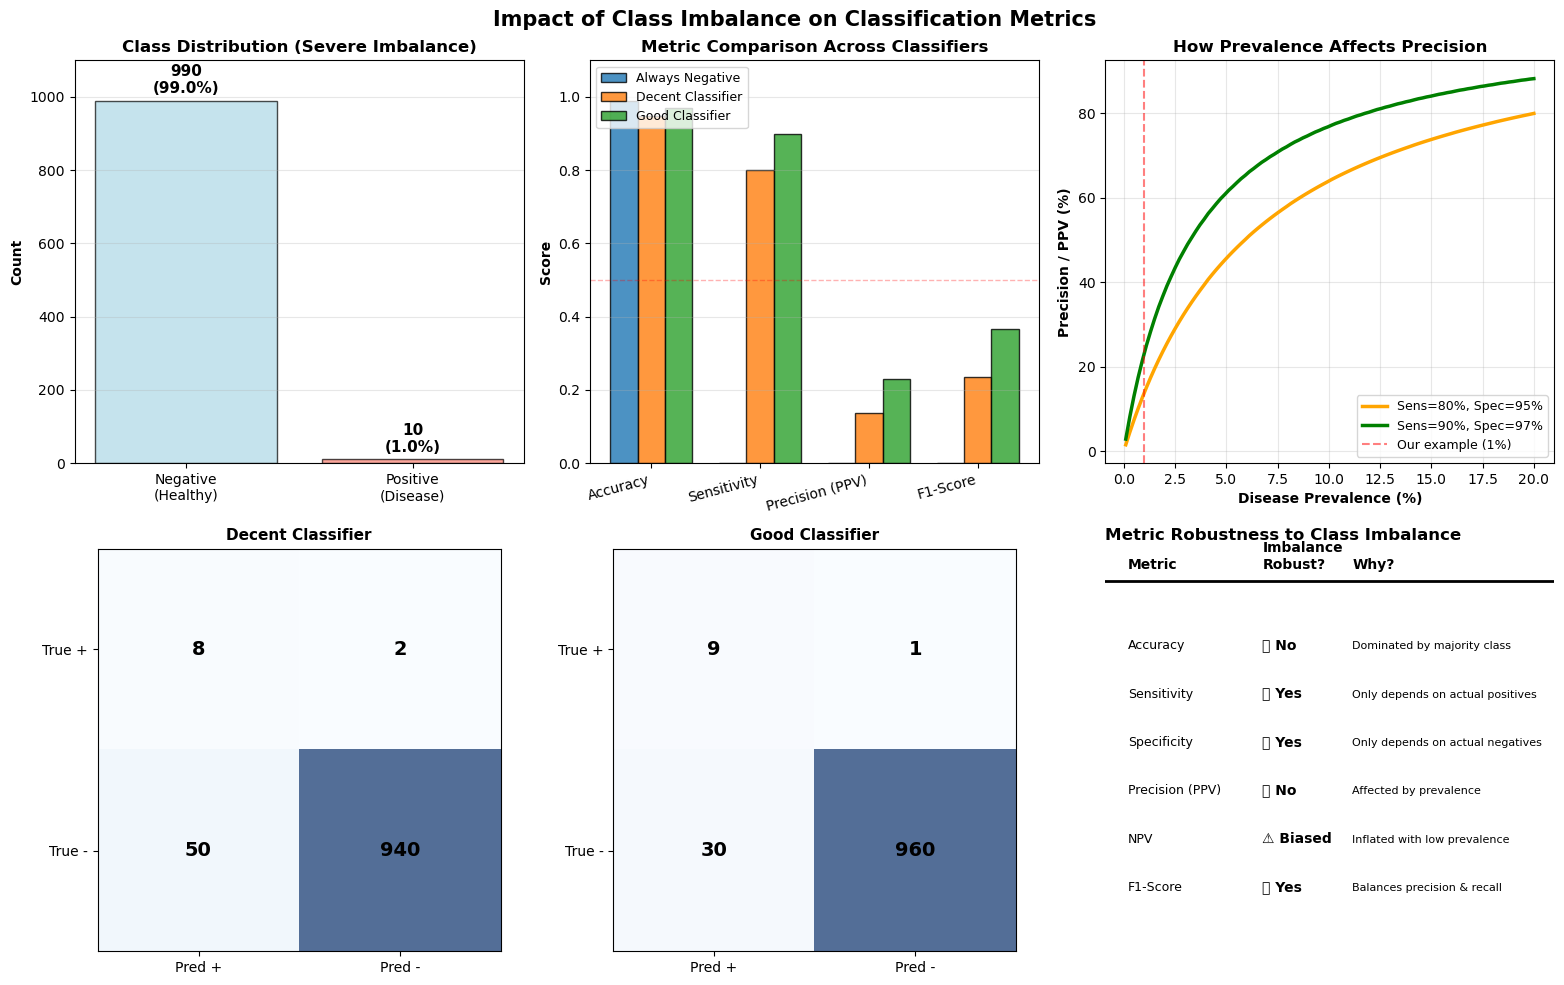


RECOMMENDATIONS FOR IMBALANCED DATA:
✓ Use F1-score, precision, recall alongside accuracy
✓ Always examine the confusion matrix
✓ Report per-class metrics separately
✓ Consider using ROC-AUC or PR-AUC curves
✓ Use stratified sampling for train/test splits
✓ Consider resampling techniques (SMOTE, undersampling)
✓ Use class weights in your model's loss function


In [7]:
# Example: Impact of Class Imbalance on Metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def evaluate_classifier(tp, fp, fn, tn, name):
    """Evaluate and return metrics for a classifier"""
    total = tp + fp + fn + tn
    actual_pos = tp + fn
    actual_neg = fp + tn
    
    accuracy = (tp + tn) / total
    sensitivity = tp / actual_pos if actual_pos > 0 else 0
    specificity = tn / actual_neg if actual_neg > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    
    return {
        'Name': name,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision (PPV)': precision,
        'NPV': npv,
        'F1-Score': f1
    }

print("=" * 80)
print("CLASS IMBALANCE: Comparing Classifiers on Imbalanced Data")
print("=" * 80)

# Scenario: Rare disease - 1% prevalence
# Total: 1000 patients, 10 with disease, 990 without
total_patients = 1000
diseased = 10
healthy = 990

print(f"\nDataset: {total_patients} patients")
print(f"  Positive class (Disease): {diseased} ({diseased/total_patients:.1%})")
print(f"  Negative class (Healthy): {healthy} ({healthy/total_patients:.1%})")
print(f"  Imbalance Ratio: {healthy/diseased:.0f}:1")

# Classifier 1: "Always predict negative" (baseline)
results_always_neg = evaluate_classifier(0, 0, 10, 990, "Always Negative")

# Classifier 2: "Decent classifier" with 80% sensitivity
results_decent = evaluate_classifier(8, 50, 2, 940, "Decent Classifier")

# Classifier 3: "Good classifier" with 90% sensitivity
results_good = evaluate_classifier(9, 30, 1, 960, "Good Classifier")

# Display results
print("\n" + "=" * 80)
print("CLASSIFIER COMPARISON")
print("=" * 80)

classifiers = [results_always_neg, results_decent, results_good]

for clf in classifiers:
    print(f"\n{clf['Name']}:")
    print(f"  Accuracy:    {clf['Accuracy']:.1%} {'⚠️ MISLEADING!' if clf['Name'] == 'Always Negative' else ''}")
    print(f"  Sensitivity: {clf['Sensitivity']:.1%}")
    print(f"  Specificity: {clf['Specificity']:.1%}")
    print(f"  Precision:   {clf['Precision (PPV)']:.1%}")
    print(f"  F1-Score:    {clf['F1-Score']:.1%}")

print("\n" + "=" * 80)
print("KEY OBSERVATIONS:")
print("=" * 80)
print("1. 'Always Negative' has 99% accuracy but 0% sensitivity - useless!")
print("2. Even 'Good Classifier' has only 23% precision (PPV)")
print("3. F1-Score clearly differentiates useful classifiers")
print("4. Accuracy alone is MISLEADING with imbalanced data!")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Class distribution
ax = axes[0, 0]
ax.bar(['Negative\n(Healthy)', 'Positive\n(Disease)'], [healthy, diseased], 
       color=['lightblue', 'salmon'], edgecolor='black', alpha=0.7)
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Class Distribution (Severe Imbalance)', fontweight='bold', fontsize=12)
ax.text(0, healthy + 20, f'{healthy}\n({healthy/total_patients:.1%})', 
        ha='center', fontweight='bold', fontsize=11)
ax.text(1, diseased + 20, f'{diseased}\n({diseased/total_patients:.1%})', 
        ha='center', fontweight='bold', fontsize=11)
ax.set_ylim(0, 1100)
ax.grid(axis='y', alpha=0.3)

# 2. Confusion matrices
confusion_matrices = [
    ('Always Negative\n(Baseline)', np.array([[0, 10], [0, 990]])),
    ('Decent Classifier', np.array([[8, 2], [50, 940]])),
    ('Good Classifier', np.array([[9, 1], [30, 960]]))
]

for idx, (title, cm) in enumerate(confusion_matrices):
    ax = axes[0, idx] if idx == 0 else axes[1, idx-1]
    if idx > 0:
        im = ax.imshow(cm, cmap='Blues', alpha=0.7)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Pred +', 'Pred -'])
        ax.set_yticklabels(['True +', 'True -'])
        ax.set_title(title, fontweight='bold', fontsize=11)
        
        for i in range(2):
            for j in range(2):
                text = ax.text(j, i, cm[i, j], ha="center", va="center", 
                             color="black", fontsize=14, fontweight='bold')

# 3. Metric comparison bars
ax = axes[0, 1]
metrics_to_plot = ['Accuracy', 'Sensitivity', 'Precision (PPV)', 'F1-Score']
x = np.arange(len(metrics_to_plot))
width = 0.25

for idx, clf in enumerate(classifiers):
    values = [clf[m] for m in metrics_to_plot]
    offset = (idx - 1) * width
    bars = ax.bar(x + offset, values, width, label=clf['Name'], alpha=0.8, edgecolor='black')

ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Metric Comparison Across Classifiers', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot, rotation=15, ha='right')
ax.legend(loc='upper left', fontsize=9)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)
ax.axhline(0.5, color='red', linestyle='--', alpha=0.3, linewidth=1)

# 4. Precision vs Prevalence
ax = axes[0, 2]
prevalences = np.linspace(0.001, 0.2, 100)
precisions_80 = []
precisions_90 = []

for prev in prevalences:
    total = 10000
    pos = int(total * prev)
    neg = total - pos
    
    # 80% sensitivity, 95% specificity
    tp_80 = int(pos * 0.80)
    fp_80 = int(neg * 0.05)
    ppv_80 = tp_80 / (tp_80 + fp_80) if (tp_80 + fp_80) > 0 else 0
    precisions_80.append(ppv_80)
    
    # 90% sensitivity, 97% specificity
    tp_90 = int(pos * 0.90)
    fp_90 = int(neg * 0.03)
    ppv_90 = tp_90 / (tp_90 + fp_90) if (tp_90 + fp_90) > 0 else 0
    precisions_90.append(ppv_90)

ax.plot(prevalences * 100, np.array(precisions_80) * 100, 
        linewidth=2.5, label='Sens=80%, Spec=95%', color='orange')
ax.plot(prevalences * 100, np.array(precisions_90) * 100, 
        linewidth=2.5, label='Sens=90%, Spec=97%', color='green')
ax.axvline(1, color='red', linestyle='--', alpha=0.5, label='Our example (1%)')
ax.set_xlabel('Disease Prevalence (%)', fontweight='bold')
ax.set_ylabel('Precision / PPV (%)', fontweight='bold')
ax.set_title('How Prevalence Affects Precision', fontweight='bold', fontsize=12)
ax.legend(fontsize=9)
ax.grid(alpha=0.3)

# 5. Metric robustness indicator
ax = axes[1, 2]
ax.axis('off')

robustness_table = [
    ('Metric', 'Imbalance\nRobust?', 'Why?'),
    ('Accuracy', '❌ No', 'Dominated by majority class'),
    ('Sensitivity', '✅ Yes', 'Only depends on actual positives'),
    ('Specificity', '✅ Yes', 'Only depends on actual negatives'),
    ('Precision (PPV)', '❌ No', 'Affected by prevalence'),
    ('NPV', '⚠️ Biased', 'Inflated with low prevalence'),
    ('F1-Score', '✅ Yes', 'Balances precision & recall'),
]

y_start = 0.95
for i, (metric, robust, reason) in enumerate(robustness_table):
    if i == 0:  # Header
        ax.text(0.05, y_start, metric, fontsize=10, fontweight='bold')
        ax.text(0.35, y_start, robust, fontsize=10, fontweight='bold')
        ax.text(0.55, y_start, reason, fontsize=10, fontweight='bold')
        ax.plot([0, 1], [y_start - 0.03, y_start - 0.03], 'k-', linewidth=2)
        y_start -= 0.08
    else:
        ax.text(0.05, y_start - i * 0.12, metric, fontsize=9)
        ax.text(0.35, y_start - i * 0.12, robust, fontsize=10, fontweight='bold')
        ax.text(0.55, y_start - i * 0.12, reason, fontsize=8)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Metric Robustness to Class Imbalance', fontweight='bold', fontsize=12, loc='left')

plt.suptitle('Impact of Class Imbalance on Classification Metrics', 
             fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR IMBALANCED DATA:")
print("=" * 80)
print("✓ Use F1-score, precision, recall alongside accuracy")
print("✓ Always examine the confusion matrix")
print("✓ Report per-class metrics separately")
print("✓ Consider using ROC-AUC or PR-AUC curves")
print("✓ Use stratified sampling for train/test splits")
print("✓ Consider resampling techniques (SMOTE, undersampling)")
print("✓ Use class weights in your model's loss function")
print("=" * 80)

## 6. Summary and Quick Reference

### 6.1 Formula Cheat Sheet

| **Concept** | **Formula** | **Interpretation** |
|------------|-------------|-------------------|
| **Basic Probability** | $P(E) = \frac{\text{favorable outcomes}}{\text{total outcomes}}$ | Likelihood of event E |
| **Complement** | $P(E^c) = 1 - P(E)$ | Probability of NOT E |
| **Addition Rule** | $P(A \cup B) = P(A) + P(B) - P(A \cap B)$ | Probability of A OR B |
| **Multiplication Rule** | $P(A \cap B) = P(A) \times P(B\|A)$ | Probability of A AND B |
| **Conditional Probability** | $P(A\|B) = \frac{P(A \cap B)}{P(B)}$ | Probability of A given B |
| **Independence** | $P(A \cap B) = P(A) \times P(B)$ | Events don't affect each other |
| **Bayes' Theorem** | $P(A\|B) = \frac{P(B\|A) \cdot P(A)}{P(B)}$ | Update beliefs with evidence |
| **Sensitivity (Recall)** | $\frac{TP}{TP + FN}$ | % of actual positives found |
| **Specificity** | $\frac{TN}{TN + FP}$ | % of actual negatives found |
| **Precision (PPV)** | $\frac{TP}{TP + FP}$ | % of predicted positives correct |
| **NPV** | $\frac{TN}{TN + FN}$ | % of predicted negatives correct |
| **FPR** | $\frac{FP}{FP + TN} = 1 - \text{Specificity}$ | False alarm rate |
| **FNR** | $\frac{FN}{FN + TP} = 1 - \text{Sensitivity}$ | Miss rate |
| **F1-Score** | $2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ | Harmonic mean of precision/recall |

### 6.2 Key Takeaways

**1. Probability Foundations**
- Sample space contains all possible outcomes
- Events are subsets of sample space
- Probabilities range from 0 to 1
- Complement rule: P(not A) = 1 - P(A)

**2. Conditional Probability**
- P(A|B) ≠ P(B|A) in general (order matters!)
- Independence means P(A|B) = P(A)
- Conditioning reduces the sample space

**3. Bayes' Theorem**
- Flips conditional probabilities: P(A|B) from P(B|A)
- Components: Prior × Likelihood / Evidence = Posterior
- **Base rate matters!** Low prevalence dramatically affects results
- Foundation of probabilistic machine learning

**4. Classification Metrics**
- **Sensitivity/Recall:** How many actual positives did we find?
- **Specificity:** How many actual negatives did we identify?
- **Precision/PPV:** When we predict positive, how often are we right?
- **NPV:** When we predict negative, how often are we right?
- Sensitivity/Specificity: Test properties (don't change with prevalence)
- PPV/NPV: Clinical usefulness (change with prevalence)

**5. Class Imbalance**
- Accuracy is misleading with imbalanced data
- "Always predict majority" gives high accuracy but is useless
- Use F1-score, precision, recall, and confusion matrix
- PPV drops dramatically with low prevalence
- Always report multiple metrics, not just accuracy

**6. Critical Distinctions**

| Question | Metric | Formula |
|----------|--------|---------|
| "How many true positives did we catch?" | Sensitivity | TP/(TP+FN) |
| "How many predicted positives are real?" | Precision | TP/(TP+FP) |
| "How good at identifying negatives?" | Specificity | TN/(TN+FP) |
| "Overall correct predictions?" | Accuracy | (TP+TN)/Total |

**7. ML Applications**
- Spam detection: High precision (few false positives) preferred
- Disease screening: High sensitivity (catch all cases) preferred
- Fraud detection: Balance precision/recall with F1-score
- Always consider cost of false positives vs false negatives

## 7. Practice Exercise

**Scenario:** Email spam classifier evaluation

You've built a spam classifier and tested it on 10,000 emails:
- 1,000 emails are actually spam
- 9,000 emails are legitimate (not spam)

Your classifier's results:
- **True Positives (TP):** 850 spam emails correctly identified
- **False Positives (FP):** 450 legitimate emails incorrectly marked as spam
- **False Negatives (FN):** 150 spam emails missed
- **True Negatives (TN):** 8,550 legitimate emails correctly identified

**Questions:**

1. Calculate the **sensitivity** (recall). What does this tell you?

2. Calculate the **specificity**. What does this tell you?

3. Calculate the **precision** (PPV). What does this tell you?

4. Calculate the **accuracy**. Is accuracy a good metric here?

5. Calculate the **F1-score**.

6. If the cost of a false positive (annoying user with wrong spam flag) is much higher than a false negative (spam gets through), should you adjust your classifier threshold? How?

7. Use **Bayes' theorem** to calculate: If an email is flagged as spam by your classifier, what's the probability it's actually spam? (Hint: This is PPV, but derive it using Bayes)

**Run the cell below to check your answers!**

PRACTICE EXERCISE SOLUTIONS: Spam Classifier Evaluation

Dataset Overview:
  Total emails: 10,000
  Actual spam: 1,000 (10.0%)
  Actual legitimate: 9,000 (90.0%)

Confusion Matrix:
  TP (Spam caught): 850
  FP (False alarms): 450
  FN (Spam missed): 150
  TN (Legit identified): 8550

1. SENSITIVITY (Recall) = TP / (TP + FN)
   = 850 / (850 + 150)
   = 850 / 1000
   = 85.0%

   ✓ Interpretation: We catch 85.0% of all spam emails.
   ✓ We miss 15.0% of spam (false negatives).

2. SPECIFICITY = TN / (TN + FP)
   = 8550 / (8550 + 450)
   = 8550 / 9000
   = 95.0%

   ✓ Interpretation: We correctly identify 95.0% of legitimate emails.
   ✓ We incorrectly flag 5.0% of legit emails as spam (annoying!).

3. PRECISION (PPV) = TP / (TP + FP)
   = 850 / (850 + 450)
   = 850 / 1300
   = 65.4%

   ✓ Interpretation: When we flag as spam, we're right 65.4% of the time.
   ✓ 34.6% of flagged emails are actually legitimate (false alarms!).

4. ACCURACY = (TP + TN) / Total
   = (850 + 8550) / 10000
   = 

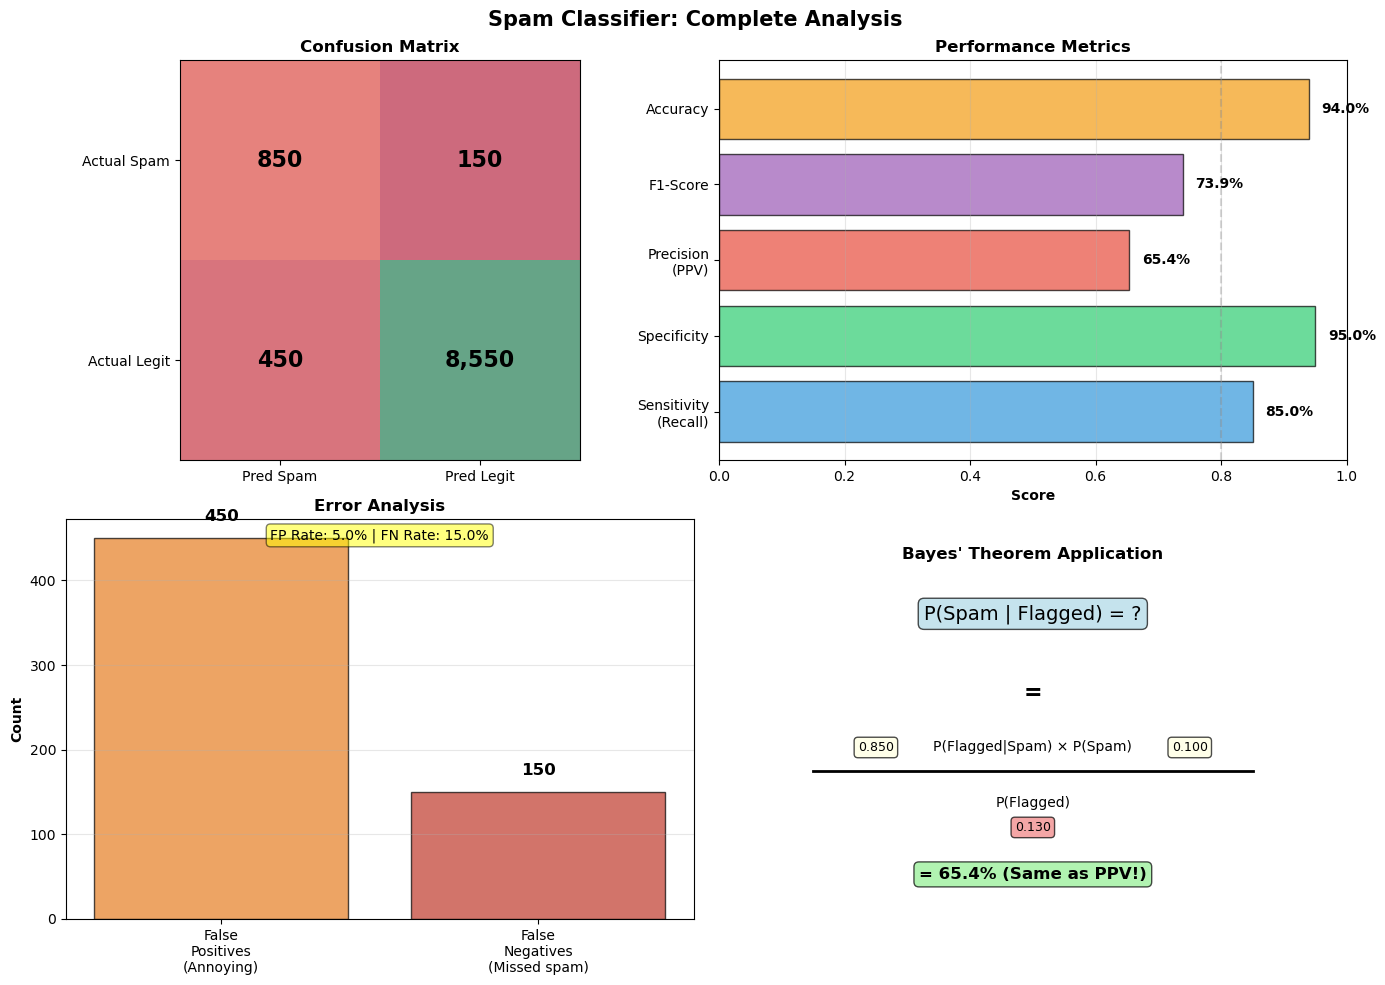


KEY INSIGHTS:
✓ High accuracy (94%) but still significant false positive problem
✓ 65% precision means 35% of spam flags are wrong (annoying users!)
✓ Should increase threshold to reduce false positives
✓ F1-score (74.7%) better reflects actual performance than accuracy
✓ Bayes' theorem confirms: PPV depends on base rate + test characteristics


In [8]:
# Practice Exercise Solution: Spam Classifier Evaluation
import numpy as np
import matplotlib.pyplot as plt

# Given data
tp = 850   # Spam correctly identified
fp = 450   # Legitimate marked as spam (annoying!)
fn = 150   # Spam missed
tn = 8550  # Legitimate correctly identified

total = tp + fp + fn + tn
actual_spam = tp + fn
actual_legit = fp + tn
predicted_spam = tp + fp
predicted_legit = fn + tn

print("=" * 80)
print("PRACTICE EXERCISE SOLUTIONS: Spam Classifier Evaluation")
print("=" * 80)

print(f"\nDataset Overview:")
print(f"  Total emails: {total:,}")
print(f"  Actual spam: {actual_spam:,} ({actual_spam/total:.1%})")
print(f"  Actual legitimate: {actual_legit:,} ({actual_legit/total:.1%})")

print(f"\nConfusion Matrix:")
print(f"  TP (Spam caught): {tp}")
print(f"  FP (False alarms): {fp}")
print(f"  FN (Spam missed): {fn}")
print(f"  TN (Legit identified): {tn}")

# 1. Sensitivity (Recall)
sensitivity = tp / actual_spam
print(f"\n" + "=" * 80)
print(f"1. SENSITIVITY (Recall) = TP / (TP + FN)")
print(f"   = {tp} / ({tp} + {fn})")
print(f"   = {tp} / {actual_spam}")
print(f"   = {sensitivity:.1%}")
print(f"\n   ✓ Interpretation: We catch {sensitivity:.1%} of all spam emails.")
print(f"   ✓ We miss {(1-sensitivity):.1%} of spam (false negatives).")

# 2. Specificity
specificity = tn / actual_legit
print(f"\n" + "=" * 80)
print(f"2. SPECIFICITY = TN / (TN + FP)")
print(f"   = {tn} / ({tn} + {fp})")
print(f"   = {tn} / {actual_legit}")
print(f"   = {specificity:.1%}")
print(f"\n   ✓ Interpretation: We correctly identify {specificity:.1%} of legitimate emails.")
print(f"   ✓ We incorrectly flag {(1-specificity):.1%} of legit emails as spam (annoying!).")

# 3. Precision (PPV)
precision = tp / predicted_spam
print(f"\n" + "=" * 80)
print(f"3. PRECISION (PPV) = TP / (TP + FP)")
print(f"   = {tp} / ({tp} + {fp})")
print(f"   = {tp} / {predicted_spam}")
print(f"   = {precision:.1%}")
print(f"\n   ✓ Interpretation: When we flag as spam, we're right {precision:.1%} of the time.")
print(f"   ✓ {(1-precision):.1%} of flagged emails are actually legitimate (false alarms!).")

# 4. Accuracy
accuracy = (tp + tn) / total
print(f"\n" + "=" * 80)
print(f"4. ACCURACY = (TP + TN) / Total")
print(f"   = ({tp} + {tn}) / {total}")
print(f"   = {tp + tn} / {total}")
print(f"   = {accuracy:.1%}")
print(f"\n   ⚠️ Analysis: Accuracy is {accuracy:.1%}, which sounds great!")
print(f"   ⚠️ BUT: A dumb classifier that always says 'not spam' gets {actual_legit/total:.1%}!")
print(f"   ⚠️ Accuracy is misleading with 90:10 class imbalance.")

# 5. F1-Score
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f"\n" + "=" * 80)
print(f"5. F1-SCORE = 2 × (Precision × Recall) / (Precision + Recall)")
print(f"   = 2 × ({precision:.3f} × {sensitivity:.3f}) / ({precision:.3f} + {sensitivity:.3f})")
print(f"   = {f1:.1%}")
print(f"\n   ✓ F1-Score balances precision and recall.")
print(f"   ✓ Better metric than accuracy for imbalanced data.")

# 6. Threshold adjustment
print(f"\n" + "=" * 80)
print(f"6. THRESHOLD ADJUSTMENT:")
print(f"   Current FP rate: {fp} false positives ({(1-specificity):.1%} of legit emails)")
print(f"   Current FN rate: {fn} false negatives ({(1-sensitivity):.1%} of spam)")
print(f"\n   If FP cost > FN cost (false alarms worse than missed spam):")
print(f"   ✓ INCREASE threshold for 'spam' classification")
print(f"   ✓ This will DECREASE false positives (fewer false alarms)")
print(f"   ✓ But will INCREASE false negatives (more spam gets through)")
print(f"   ✓ Trade-off: Higher precision, lower recall")
print(f"\n   Action: Adjust threshold to maximize precision while maintaining acceptable recall.")

# 7. Bayes' Theorem
p_spam = actual_spam / total  # Prior
p_flagged_given_spam = sensitivity  # Likelihood
p_flagged_given_legit = 1 - specificity  # False positive rate
p_flagged = predicted_spam / total  # Evidence

p_spam_given_flagged = (p_flagged_given_spam * p_spam) / p_flagged

print(f"\n" + "=" * 80)
print(f"7. BAYES' THEOREM: P(Spam | Flagged)")
print(f"\n   P(Spam|Flagged) = P(Flagged|Spam) × P(Spam) / P(Flagged)")
print(f"\n   Components:")
print(f"   • P(Spam) = {actual_spam}/{total} = {p_spam:.3f} (Prior/Base rate)")
print(f"   • P(Flagged|Spam) = {sensitivity:.3f} (Sensitivity/Likelihood)")
print(f"   • P(Flagged|Legit) = {1-specificity:.3f} (False positive rate)")
print(f"   • P(Flagged) = {predicted_spam}/{total} = {p_flagged:.3f} (Evidence)")
print(f"\n   P(Spam|Flagged) = ({sensitivity:.3f} × {p_spam:.3f}) / {p_flagged:.3f}")
print(f"                   = {p_spam_given_flagged:.3f}")
print(f"                   = {p_spam_given_flagged:.1%}")
print(f"\n   ✓ This is exactly the PPV/Precision we calculated!")
print(f"   ✓ When email is flagged, {p_spam_given_flagged:.1%} chance it's actually spam.")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Confusion Matrix
ax = axes[0, 0]
cm = np.array([[tp, fn], [fp, tn]])
im = ax.imshow(cm, cmap='RdYlGn', alpha=0.6, vmin=0, vmax=tn)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Pred Spam', 'Pred Legit'])
ax.set_yticklabels(['Actual Spam', 'Actual Legit'])
ax.set_title('Confusion Matrix', fontweight='bold', fontsize=12)

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, f'{cm[i, j]:,}', ha="center", va="center", 
                      color="black", fontsize=16, fontweight='bold')

# 2. Metrics comparison
ax = axes[0, 1]
metrics = ['Sensitivity\n(Recall)', 'Specificity', 'Precision\n(PPV)', 'F1-Score', 'Accuracy']
values = [sensitivity, specificity, precision, f1, accuracy]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']

bars = ax.barh(metrics, values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Score', fontweight='bold')
ax.set_title('Performance Metrics', fontweight='bold', fontsize=12)
ax.set_xlim(0, 1)
ax.grid(axis='x', alpha=0.3)
ax.axvline(0.8, color='gray', linestyle='--', alpha=0.3, label='80% threshold')

for bar, val in zip(bars, values):
    ax.text(val + 0.02, bar.get_y() + bar.get_height()/2, 
           f'{val:.1%}', va='center', fontweight='bold', fontsize=10)

# 3. Error analysis
ax = axes[1, 0]
error_types = ['False\nPositives\n(Annoying)', 'False\nNegatives\n(Missed spam)']
error_counts = [fp, fn]
error_colors = ['#e67e22', '#c0392b']

bars = ax.bar(error_types, error_counts, color=error_colors, edgecolor='black', alpha=0.7)
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Error Analysis', fontweight='bold', fontsize=12)
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, error_counts):
    ax.text(bar.get_x() + bar.get_width()/2, count + 20, 
           f'{count:,}', ha='center', fontweight='bold', fontsize=12)

ax.text(0.5, 0.95, f'FP Rate: {(1-specificity):.1%} | FN Rate: {(1-sensitivity):.1%}', 
       transform=ax.transAxes, ha='center', fontsize=10,
       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 4. Bayes visualization
ax = axes[1, 1]
ax.text(0.5, 0.90, "Bayes' Theorem Application", ha='center', 
       fontsize=12, fontweight='bold')
ax.text(0.5, 0.75, 'P(Spam | Flagged) = ?', ha='center', 
       fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

ax.text(0.5, 0.55, '=', ha='center', fontsize=16, fontweight='bold')

ax.text(0.5, 0.42, 'P(Flagged|Spam) × P(Spam)', ha='center', fontsize=10)
ax.text(0.25, 0.42, f'{sensitivity:.3f}', ha='center', fontsize=9,
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
ax.text(0.75, 0.42, f'{p_spam:.3f}', ha='center', fontsize=9,
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

ax.plot([0.15, 0.85], [0.37, 0.37], 'k-', linewidth=2)

ax.text(0.5, 0.28, 'P(Flagged)', ha='center', fontsize=10)
ax.text(0.5, 0.22, f'{p_flagged:.3f}', ha='center', fontsize=9,
       bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

ax.text(0.5, 0.10, f'= {p_spam_given_flagged:.1%} (Same as PPV!)', 
       ha='center', fontsize=12, fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.suptitle('Spam Classifier: Complete Analysis', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY INSIGHTS:")
print("=" * 80)
print("✓ High accuracy (94%) but still significant false positive problem")
print("✓ 65% precision means 35% of spam flags are wrong (annoying users!)")
print("✓ Should increase threshold to reduce false positives")
print("✓ F1-score (74.7%) better reflects actual performance than accuracy")
print("✓ Bayes' theorem confirms: PPV depends on base rate + test characteristics")
print("=" * 80)

---

## 🎉 Congratulations! You've Completed Module 2!

You've now mastered **Probability Basics for Machine Learning**, including:

### ✅ What You've Learned:

**1. Probability Foundations**
- Events, sample spaces, and probability axioms
- Addition and multiplication rules
- Practical applications with cards, dice, and real-world examples

**2. Conditional Probability & Independence**
- P(A|B) and how it differs from P(A)
- Independence testing and medical diagnosis examples
- Real-world applications in ML feature selection

**3. Bayes' Theorem**
- Formula and intuition
- Base-rate effects and why they matter
- Updating beliefs with new evidence
- Applications in spam filtering, medical diagnosis, and ML models

**4. Binary Classification Metrics**
- Confusion matrix components (TP, FP, TN, FN)
- Sensitivity (Recall) and Specificity
- Precision (PPV) and its trade-offs
- False Positive Rate (FPR) and False Negative Rate (FNR)
- Negative Predictive Value (NPV)
- When to prioritize each metric

**5. Class Imbalance**
- Why accuracy fails with imbalanced data
- The "accuracy paradox"
- How to evaluate models on imbalanced datasets
- Trade-offs between precision and recall

**6. Practical Skills**
- Calculating all key metrics from confusion matrices
- Interpreting results in context
- Making threshold decisions based on cost-benefit analysis
- Using Bayes' theorem to validate metric calculations

---

### 🎯 Skills You Can Now Apply:

✓ **Evaluate ML classifiers** using appropriate metrics beyond accuracy  
✓ **Interpret confusion matrices** and extract actionable insights  
✓ **Handle imbalanced datasets** with proper metric selection  
✓ **Apply Bayes' theorem** to update probabilities with new evidence  
✓ **Make informed threshold decisions** based on business costs  
✓ **Avoid the accuracy trap** and use F1-score, precision, recall appropriately  

---

### 📚 Next Steps:

You're now ready to move forward to **Module 3**, where you'll build on this probability foundation to explore:
- **Probability Distributions** (Binomial, Normal, etc.)
- **Random Variables** and Expectation
- **Maximum Likelihood Estimation**
- **Statistical Testing** for ML

Keep practicing these concepts—they're fundamental to understanding how machine learning algorithms make decisions!

---

### 💡 Study Tips:

1. **Practice with real datasets**: Apply these metrics to actual classification problems
2. **Experiment with thresholds**: See how changing thresholds affects precision vs. recall
3. **Review the formulas**: Keep the cheat sheet handy—these formulas are used constantly in ML
4. **Connect to Module 1**: Notice how outlier detection relates to FP/FN trade-offs
5. **Think critically about base rates**: Always consider class distribution before trusting accuracy

---

**Great work! You're building a solid foundation in machine learning fundamentals.** 🚀